In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zhanel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zhanel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zhanel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.shape

(159571, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [12]:
df = df.dropna(subset=["comment_text"])

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(159571, 8)

In [16]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [17]:
df["clean_comment"] = df["comment_text"].apply(clean_text)

In [18]:
df[["comment_text", "clean_comment"]].head()

,comment_text,clean_comment
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",cant make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page thats


In [19]:
toxic_labels = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate"
]

df[toxic_labels].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [20]:
df.to_csv("train_cleaned.csv", index=False)

In [22]:
toxic_labels = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate"
]

df["any_toxic"] = df[toxic_labels].sum(axis=1) > 0

df["any_toxic"].value_counts()

any_toxic
False    143346
True      16225
Name: count, dtype: int64

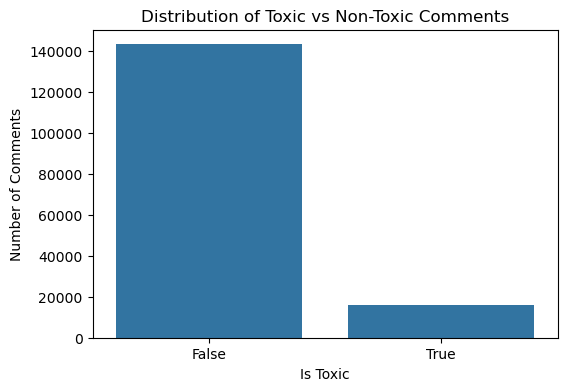

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="any_toxic", data=df)
plt.title("Distribution of Toxic vs Non-Toxic Comments")
plt.xlabel("Is Toxic")
plt.ylabel("Number of Comments")
plt.show()

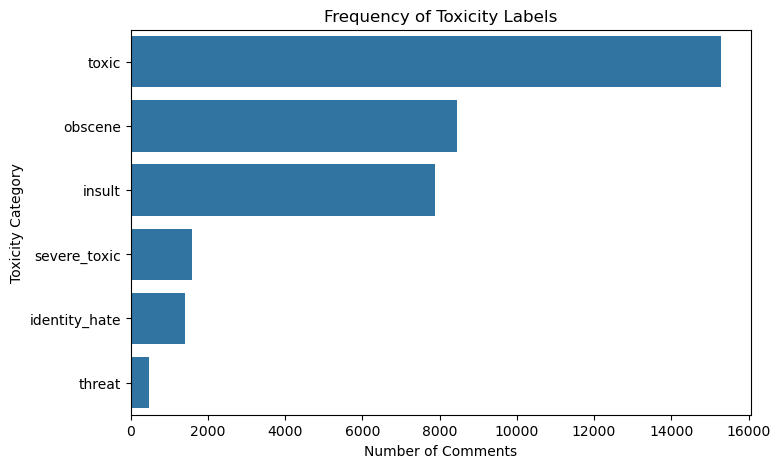

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.values, y=label_counts.index)
plt.title("Frequency of Toxicity Labels")
plt.xlabel("Number of Comments")
plt.ylabel("Toxicity Category")
plt.show()

In [26]:
df["num_labels"] = df[toxic_labels].sum(axis=1)
df["num_labels"].value_counts().sort_index()

num_labels
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64

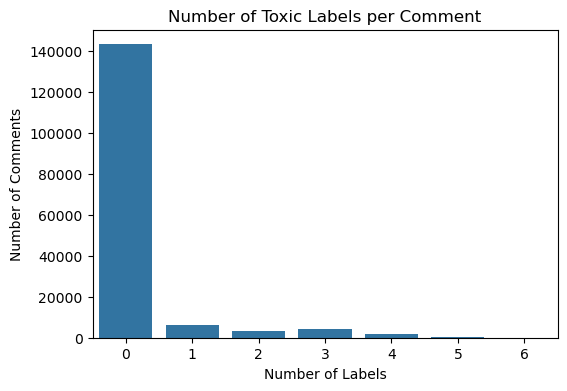

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="num_labels", data=df)
plt.title("Number of Toxic Labels per Comment")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Comments")
plt.show()

In [28]:
df["comment_length"] = df["clean_comment"].apply(lambda x: len(x.split()))
df["comment_length"].describe()

count    159571.000000
mean         34.238577
std          52.806831
min           0.000000
25%           8.000000
50%          18.000000
75%          38.000000
max        1250.000000
Name: comment_length, dtype: float64

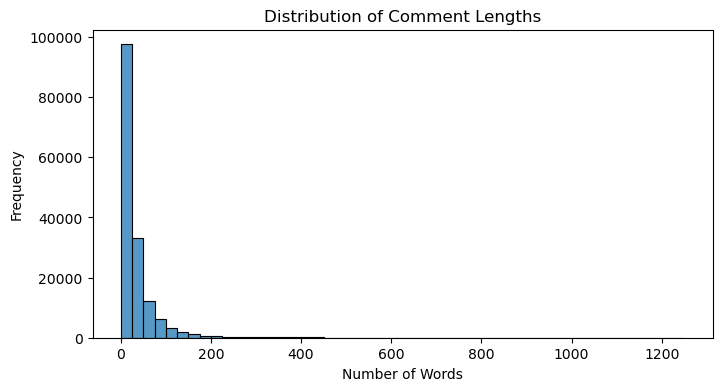

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df["comment_length"], bins=50)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()